# MEDICAL INSURANCE COST PREDICTION  

In [22]:
### Importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder

- Data Collection and Analysis 

In [3]:
data = pd.read_csv(r'C:\Users\user\Desktop\Programing\Data Sets\insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# size of the data 
data.shape

(1338, 7)

In [4]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
# Checking for missing values 
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# basic information about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Performing EDA on the data   

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Age Distribution')

<Figure size 600x600 with 0 Axes>

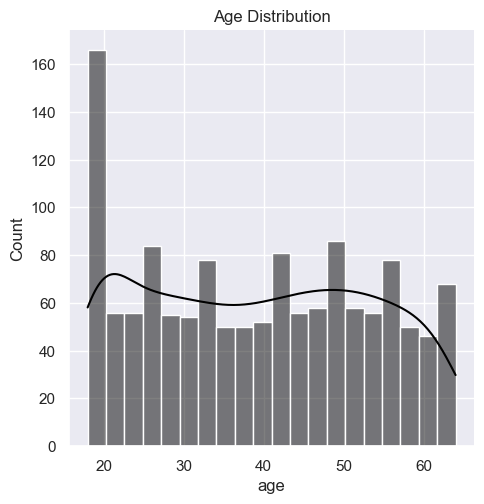

In [8]:
# distribution of age values 
sns.set()
plt.figure(figsize=(6,6))
sns.displot(x= data['age'],bins= 20, color= 'black', kde= True)
plt.title('Age Distribution')

- The dataset consists of mainly young people with age 20

<Figure size 600x600 with 0 Axes>

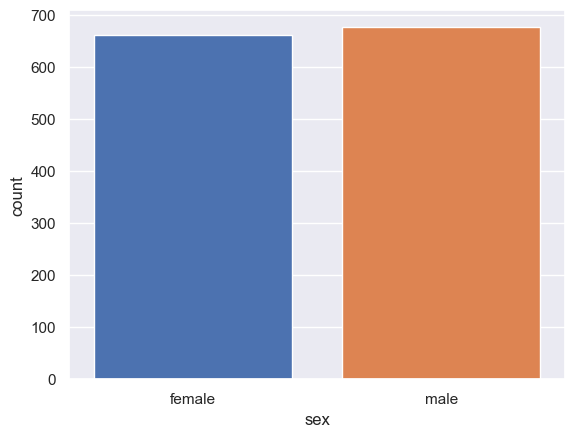

<Figure size 600x600 with 0 Axes>

In [9]:
sns.countplot(data = data, x= 'sex', saturation= 1.0)
plt.figure(figsize=(6,6))

- The dataset is fairly distributed in terms of sex 

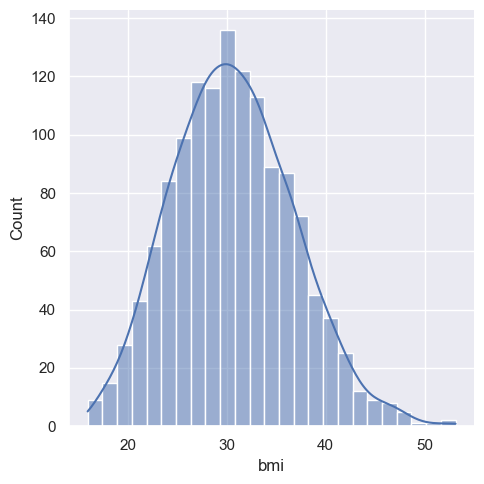

In [10]:
sns.displot(x= data['bmi'], kde=True)

- The Body mass index is normally distributed and has a mean bmi of 30

Text(0.5, 1.0, 'Distribution of Children')

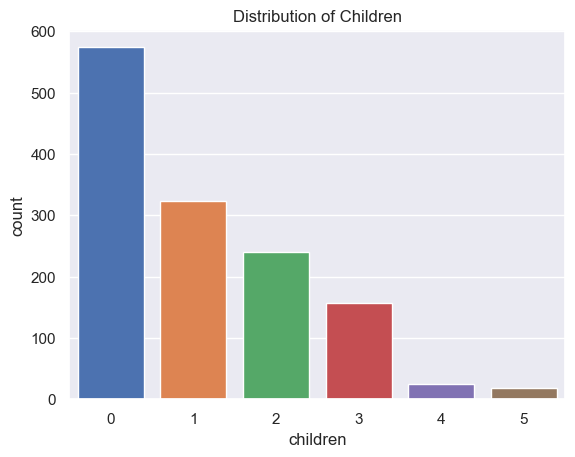

In [11]:
sns.countplot(x= data['children'], saturation= 1.0)
plt.title('Distribution of Children')

- It is observed that most people in the dataset have no children with few of them having 5 children 

Text(0.5, 1.0, 'Distribution of Charges')

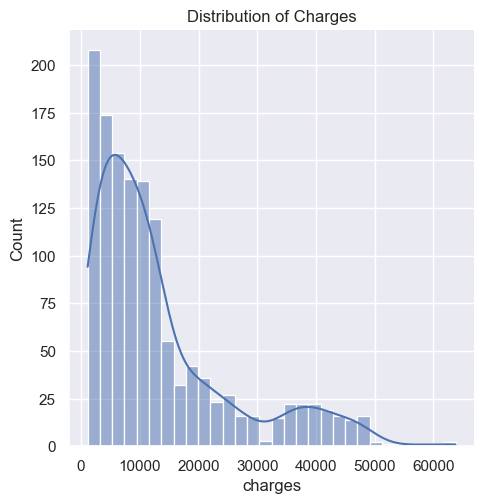

In [12]:
sns.displot(x= data['charges'], kde= True)
plt.title('Distribution of Charges')

<AxesSubplot:>

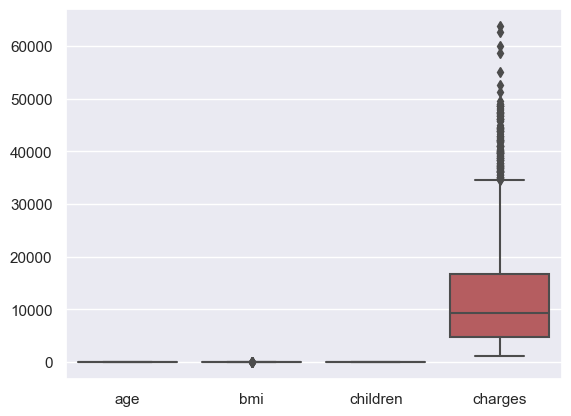

In [13]:
# Checking for Outliers
sns.boxplot(data= data)

### Feature Engineering - Label Encoding 

In [6]:
encode = LabelEncoder()

In [7]:
sex_encoded = encode.fit_transform(data['sex'])
smoker_encoded = encode.fit_transform(data['smoker'])
region_encoded = encode.fit_transform(data['region'])

In [8]:
data['sex_encoded'] = sex_encoded
data['smoker_encoded'] = smoker_encoded
data['region_encoded'] = region_encoded

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [10]:
#Reducing dataset into features and target(independent and dependent Variable)
x= data.drop(columns= ['sex', 'region', 'smoker', 'charges'], axis= 1)
y= data['charges']

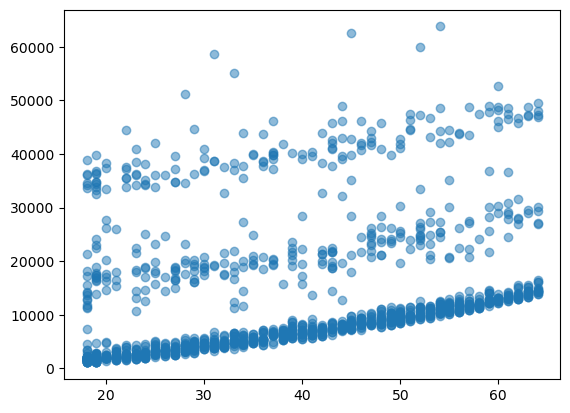

In [11]:
plt.scatter(data['age'], data['charges'], alpha= 0.5)

### Splitting the data into training and testing data 

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

### Model Training
- Linear Regression Model 

In [14]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

### Model Evaluation 

In [15]:
# training data prediction 
training_data_prediction = regressor.predict(x_train)

In [16]:
# using the R_squared optimization algorithim to check the efficiency of the model 
r_squared_train = metrics.r2_score(y_train, training_data_prediction)
print(r_squared_train)

0.7427518003973261


In [17]:
# testing data predicition 
testing_data_prediction = regressor.predict(x_test)

# using the R_squared optimization algorithim to check the efficiency of the bmodel 
r_squared_test = metrics.r2_score(y_test, testing_data_prediction)
print(r_squared_test)

0.7790865933969187


In [18]:
y_pred = regressor.predict(x_test)

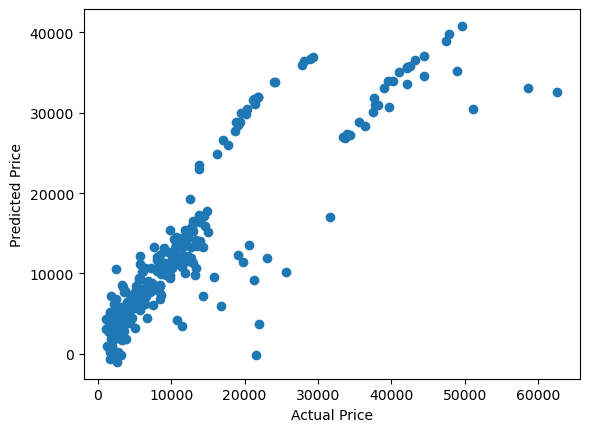

In [20]:
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.scatter(y_test, y_pred)

- Becuase the model is not highly accurate, the scatter plt above shows a bit of variation betweem the the actual and predicted Charges

In [25]:
# Taking input fr prediction 
Input = (59,1,31.79,2,0,2)

#converting Input into an array
Input_array = np.asarray(Input)

#reshaping the array of data 
Input_reshaped = Input_array.reshape(1,-1)

prediction = regressor.predict(Input_reshaped)
print(prediction[0])

20409.60862703248


C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
